# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():

    X, y = make_classification(n_samples=4000,
                          n_features=50,
                          n_redundant=30,
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)

    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

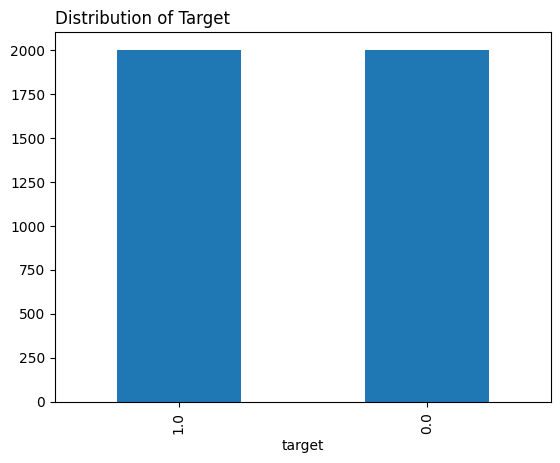

In [6]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

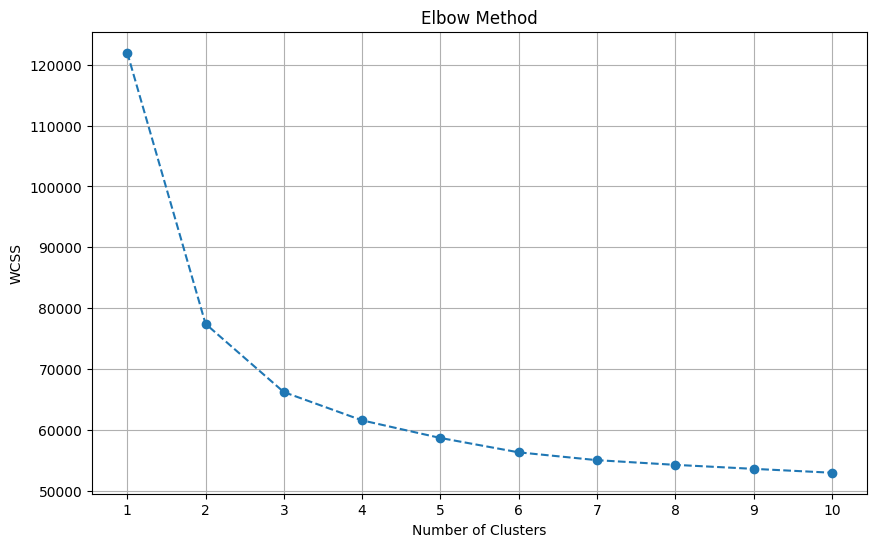

In [8]:
# Perform one-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['var0', 'var1', 'var2'])

# Fit k-means clustering for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train_encoded)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()






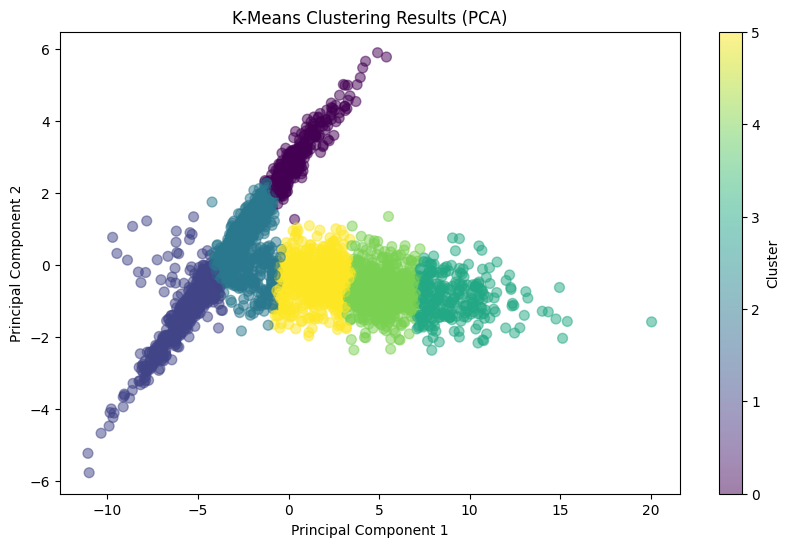

In [12]:
# Fit k-means with optimal number of clusters

from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_train_encoded)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_encoded)

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


Insert conclusions

The axes (Principal Component 1 and Principal Component 2) represent the where directions there is the most variance, where the data is most spread out. The colors from dark purple to light green represent different clusters (0 to 4, as indicated by the color bar on the right). Each dot represents a data point projected onto the first two principal components, and its color indicates the cluster it belongs to according to the K-Means algorithm. The clusters seem to be fairly well which-separated, suggests that K the-Means algorithm was effective at grouping similar data points together.

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

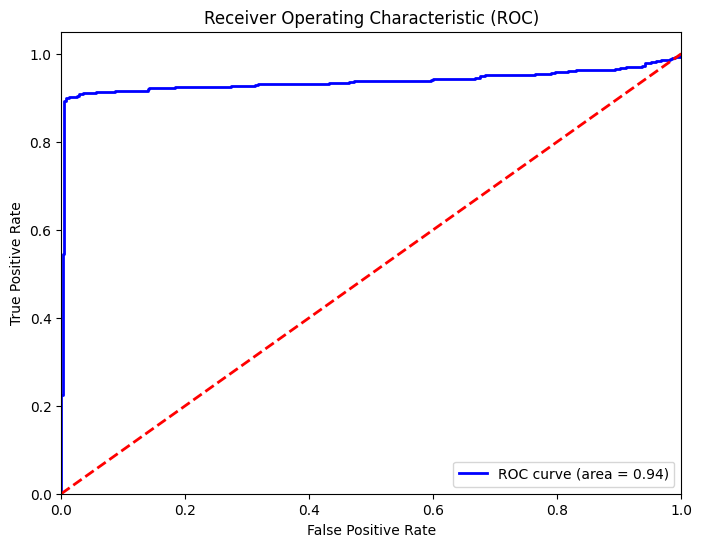

Accuracy: 0.93
Precision: 0.9943502824858758
Recall: 0.8669950738916257


In [13]:
# Insert Code

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define parameter grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best regularization strength
best_C = grid_search.best_params_['classifier__C']

# Evaluate performance on test data
y_pred = grid_search.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# ROC curve
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)




```
# This is formatted as code
```

Insert conclusions

With an accuracy of 93%, precision of approximately 99.4%, and recall of around 86.7%, the model demonstrates strong performance. Overall, the model demonstrates high precision and relatively high recall, suggesting it effectively identifies positive cases while minimizing false positives. However, the recall is slightly lower compared to precision, indicating that there are some positive instances the model misses.

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

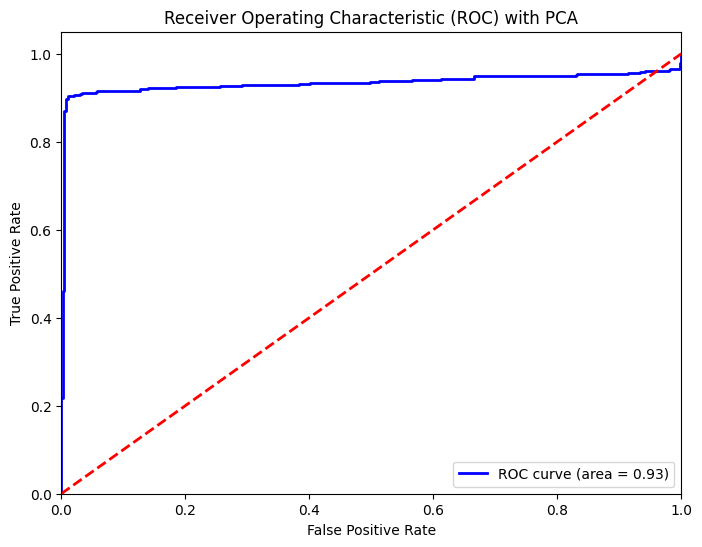

Accuracy (with PCA): 0.93
Precision (with PCA): 0.9915730337078652
Recall (with PCA): 0.8694581280788177


In [14]:
# Insert code

from sklearn.decomposition import PCA

# Define the pipeline with PCA and logistic regression
pipeline_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

# Define parameter grid for grid search
param_grid_pca = {
    'pca__n_components': [5, 10, 15, 20],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform Grid Search with cross-validation
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train, y_train)

# Best number of PCA components and regularization strength
best_n_components = grid_search_pca.best_params_['pca__n_components']
best_C_pca = grid_search_pca.best_params_['classifier__C']

# Evaluate performance on test data
y_pred_pca = grid_search_pca.predict(X_test)

# Evaluation metrics
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

# ROC curve
y_pred_proba_pca = grid_search_pca.predict_proba(X_test)[:, 1]
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_pred_proba_pca)
roc_auc_pca = roc_auc_score(y_test, y_pred_proba_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with PCA')
plt.legend(loc="lower right")
plt.show()

# Print evaluation metrics
print("Accuracy (with PCA):", accuracy_pca)
print("Precision (with PCA):", precision_pca)
print("Recall (with PCA):", recall_pca)


Insert conclusions

The metrics are nearly same as compared to the previous model. But the precision is slightly higher.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

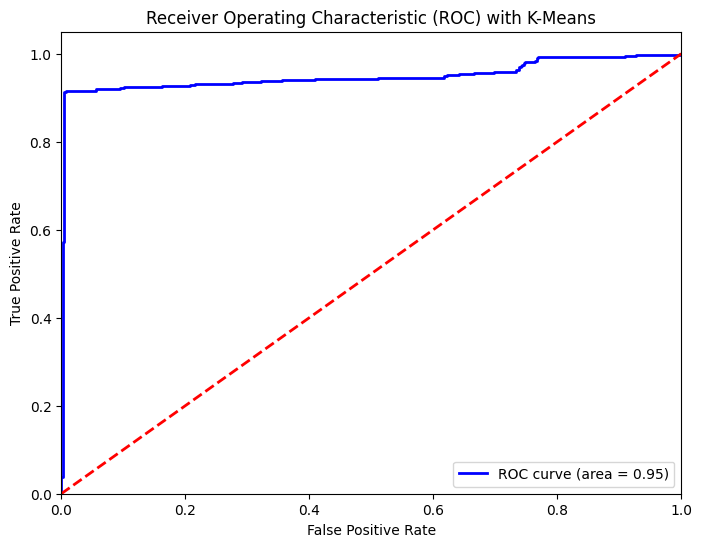

Accuracy (with K-Means): 0.94375
Precision (with K-Means): 0.9945205479452055
Recall (with K-Means): 0.8940886699507389


In [15]:
# Insert code

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_kmeans = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans()),
    ('classifier', LogisticRegression())
])

param_grid_kmeans = {
    'kmeans__n_clusters': [3, 5, 7, 10],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}


grid_search_kmeans = GridSearchCV(pipeline_kmeans, param_grid_kmeans, cv=5, scoring='accuracy')
grid_search_kmeans.fit(X_train, y_train)

best_n_clusters = grid_search_kmeans.best_params_['kmeans__n_clusters']
best_C_kmeans = grid_search_kmeans.best_params_['classifier__C']


y_pred_kmeans = grid_search_kmeans.predict(X_test)


accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
precision_kmeans = precision_score(y_test, y_pred_kmeans)
recall_kmeans = recall_score(y_test, y_pred_kmeans)


y_pred_proba_kmeans = grid_search_kmeans.predict_proba(X_test)[:, 1]
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y_test, y_pred_proba_kmeans)
roc_auc_kmeans = roc_auc_score(y_test, y_pred_proba_kmeans)

plt.figure(figsize=(8, 6))
plt.plot(fpr_kmeans, tpr_kmeans, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_kmeans)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) with K-Means')
plt.legend(loc="lower right")
plt.show()


print("Accuracy (with K-Means):", accuracy_kmeans)
print("Precision (with K-Means):", precision_kmeans)
print("Recall (with K-Means):", recall_kmeans)





Insert conclusions

The accuracy seems a bit hgiher, with precision remianing the same and recall being higher than the previous two models.

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Insert response

**I would recommend logistic regression with Kmeans since it gives a better accuracy and recall compared to other models. The area under the AUC curve is also higher for this model.**

In [16]:
# Results from Logistic Regression without any additional preprocessing (from Question 2)
accuracy_no_preprocessing = accuracy
precision_no_preprocessing = precision
recall_no_preprocessing = recall

# Results from Logistic Regression with PCA (from Question 3)
accuracy_with_pca = accuracy_pca
precision_with_pca = precision_pca
recall_with_pca = recall_pca
auc_with_pca = roc_auc_pca

# Results from Logistic Regression with k-means clustering (from Question 4)
accuracy_with_kmeans = accuracy_kmeans
precision_with_kmeans = precision_kmeans
recall_with_kmeans = recall_kmeans
auc_with_kmeans = roc_auc_kmeans

# Print the results of each model
print("Logistic Regression without any additional preprocessing:")
print("Accuracy:", accuracy_no_preprocessing)
print("Precision:", precision_no_preprocessing)
print("Recall:", recall_no_preprocessing)
print()

print("Logistic Regression with PCA:")
print("Accuracy:", accuracy_with_pca)
print("Precision:", precision_with_pca)
print("Recall:", recall_with_pca)
print("AUC:", auc_with_pca)
print()

print("Logistic Regression with k-means clustering:")
print("Accuracy:", accuracy_with_kmeans)
print("Precision:", precision_with_kmeans)
print("Recall:", recall_with_kmeans)
print("AUC:", auc_with_kmeans)


Logistic Regression without any additional preprocessing:
Accuracy: 0.93
Precision: 0.9943502824858758
Recall: 0.8669950738916257

Logistic Regression with PCA:
Accuracy: 0.93
Precision: 0.9915730337078652
Recall: 0.8694581280788177
AUC: 0.9332287264634542

Logistic Regression with k-means clustering:
Accuracy: 0.94375
Precision: 0.9945205479452055
Recall: 0.8940886699507389
AUC: 0.94867595208922
